In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1425359199254679724
 xla_global_id: -1]

In [ ]:
!pip install xmltodict 
!pip install pytest-shutil


dict_values([])


In [ ]:
import xmltodict
import os
import shutil
from collections import Counter

pathname = '/content/drive/My Drive/archive/'
annotation_pathname = '/content/drive/My Drive/archive/annotations/'
img_pathname = '/content/drive/My Drive/archive/images/'

new_img_pathname = '/content/drive/My Drive/archive/new_imgs'
new_annotation_pathname = '/content/drive/My Drive/archive/new_annos'

img_names = []
annotation_names = []
for dirname, _, filenames in os.walk(pathname):
  for filename in filenames:
    if os.path.join(dirname, filename)[-3:]!='xml':
      img_names.append(filename)
    else:
      annotation_names.append(filename)
listing=[]
new_img_names = []
for img_name in img_names[:]:
    with open(annotation_pathname+img_name[:-4]+".xml") as fd:
        doc=xmltodict.parse(fd.read())
    temp=doc["annotation"]["object"]
    if type(temp)==list:
      for i in range(len(temp)):
        if temp[i]['name']=='without_mask' or temp[i]['name']=='mask_weared_incorrect':
          new_img_names.append(img_name)
          shutil.copy(img_pathname+img_name, new_img_pathname)
          shutil.copy(annotation_pathname+img_name[:-3]+'xml', new_annotation_pathname)
          break
    else:
      if temp['name']=='without_mask' or temp['name']=='mask_weared_incorrect':
        new_img_names.append(img_name)
        shutil.copy(img_pathname+img_name, new_img_pathname)
        shutil.copy(annotation_pathname+img_name[:-3]+'xml', new_annotation_pathname)
        
print(len(new_img_names))


337


In [ ]:
listing = []
for img_name in new_img_names:
  with open(new_annotation_pathname+'/'+img_name[:-3]+'xml') as fd:
    doc=xmltodict.parse(fd.read())
  temp=doc["annotation"]["object"]
  if type(temp)==list:
      for i in range(len(temp)):
          listing.append(temp[i]["name"])
  else:
      listing.append(temp["name"])
  # print(img_name)
        

Items = Counter(listing).keys()
values = Counter(listing).values()
print(Items,'\n',values)

dict_keys(['without_mask', 'with_mask', 'mask_weared_incorrect']) 
 dict_values([717, 1653, 123])


<BarContainer object of 3 artists>

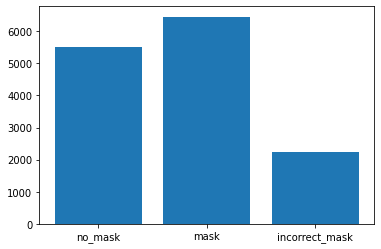

In [3]:
from matplotlib import pyplot as plt
data = {"no_mask": 5508, "mask": 6449, "incorrect_mask": 2245}
plt.bar(data.keys(), data.values())